In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("HeartDiseaseTrain-Test.xls")

In [3]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [4]:
print(df.describe())
print("\n\n----------------------------------------------------------------\n\n")
print(df.info())

               age  resting_blood_pressure  cholestoral  Max_heart_rate  \
count  1025.000000             1025.000000   1025.00000     1025.000000   
mean     54.434146              131.611707    246.00000      149.114146   
std       9.072290               17.516718     51.59251       23.005724   
min      29.000000               94.000000    126.00000       71.000000   
25%      48.000000              120.000000    211.00000      132.000000   
50%      56.000000              130.000000    240.00000      152.000000   
75%      61.000000              140.000000    275.00000      166.000000   
max      77.000000              200.000000    564.00000      202.000000   

           oldpeak       target  
count  1025.000000  1025.000000  
mean      1.071512     0.513171  
std       1.175053     0.500070  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.800000     1.000000  
75%       1.800000     1.000000  
max       6.200000     1.000000  


----------------

In [5]:
df.isnull().sum()

age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64

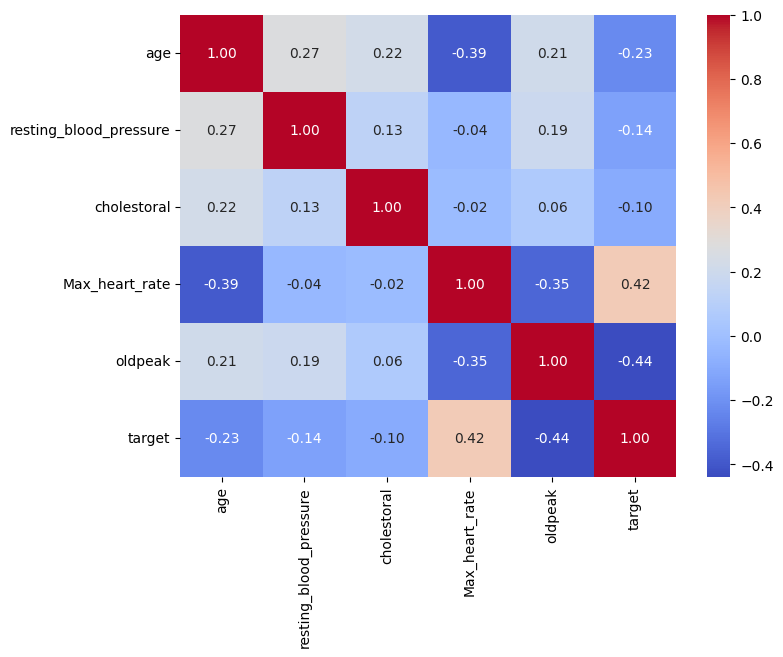

In [15]:
numeric_data = df.select_dtypes(include="number")

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm",fmt=".2f")
plt.show()

In [17]:
[column for column  in df.columns]

['age',
 'sex',
 'chest_pain_type',
 'resting_blood_pressure',
 'cholestoral',
 'fasting_blood_sugar',
 'rest_ecg',
 'Max_heart_rate',
 'exercise_induced_angina',
 'oldpeak',
 'slope',
 'vessels_colored_by_flourosopy',
 'thalassemia',
 'target']

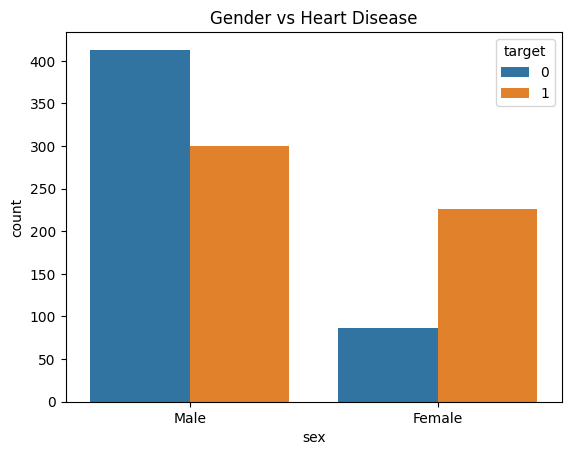

In [18]:
sns.countplot(x='sex', hue='target', data=df)
plt.title("Gender vs Heart Disease")
plt.show()

In [22]:
from sklearn.model_selection import train_test_split

data = df.copy()

X = data.drop("target", axis=1)

Y = data["target"]

In [23]:
x_train, x_test , y_train, y_test=train_test_split(X, Y, test_size=0.8, random_state=42)

In [25]:
print(data.dtypes)

age                                int64
sex                               object
chest_pain_type                   object
resting_blood_pressure             int64
cholestoral                        int64
fasting_blood_sugar               object
rest_ecg                          object
Max_heart_rate                     int64
exercise_induced_angina           object
oldpeak                          float64
slope                             object
vessels_colored_by_flourosopy     object
thalassemia                       object
target                             int64
dtype: object


In [28]:
data_encoded = pd.get_dummies(data, drop_first=True)
data_encoded

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target,sex_Male,chest_pain_type_Atypical angina,chest_pain_type_Non-anginal pain,chest_pain_type_Typical angina,...,exercise_induced_angina_Yes,slope_Flat,slope_Upsloping,vessels_colored_by_flourosopy_One,vessels_colored_by_flourosopy_Three,vessels_colored_by_flourosopy_Two,vessels_colored_by_flourosopy_Zero,thalassemia_No,thalassemia_Normal,thalassemia_Reversable Defect
0,52,125,212,168,1.0,0,True,False,False,True,...,False,False,False,False,False,True,False,False,False,True
1,53,140,203,155,3.1,0,True,False,False,True,...,True,False,True,False,False,False,True,False,False,True
2,70,145,174,125,2.6,0,True,False,False,True,...,True,False,True,False,False,False,True,False,False,True
3,61,148,203,161,0.0,0,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
4,62,138,294,106,1.9,0,False,False,False,True,...,False,True,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,140,221,164,0.0,1,True,True,False,False,...,True,False,False,False,False,False,True,False,False,False
1021,60,125,258,141,2.8,0,True,False,False,True,...,True,True,False,True,False,False,False,False,False,True
1022,47,110,275,118,1.0,0,True,False,False,True,...,True,True,False,True,False,False,False,False,False,False
1023,50,110,254,159,0.0,1,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False


In [29]:
X_encoded = data_encoded.drop("target",axis=1)
Y_encoded = data["target"]

X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y_encoded,test_size=0.2,random_state=42)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, Y_train)
lr_preds = lr_model.predict(X_test)


print("Accuracy:", accuracy_score(Y_test, lr_preds))
print("ROC-AUC:", roc_auc_score(Y_test, lr_model.predict_proba(X_test)[:, 1]))
print("Confusion Matrix:\n", confusion_matrix(Y_test, lr_preds))
print("Classification Report:\n", classification_report(Y_test, lr_preds))

Accuracy: 0.8146341463414634
ROC-AUC: 0.9036740909956215
Confusion Matrix:
 [[76 26]
 [12 91]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.75      0.80       102
           1       0.78      0.88      0.83       103

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205



c:\Users\REESAV\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


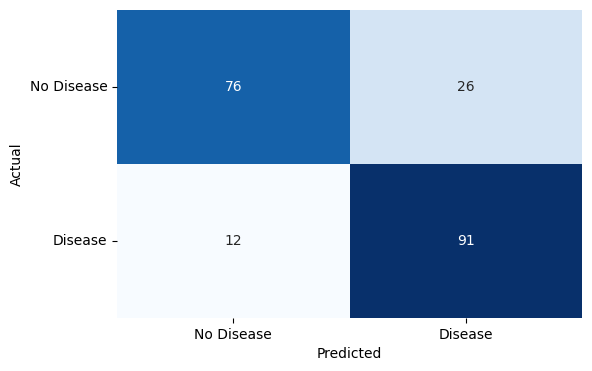

In [34]:
c_matrix = confusion_matrix(Y_test, lr_preds)

plt.figure(figsize=(6,4))
sns.heatmap(c_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.xticks([0.5, 1.5], ['No Disease', 'Disease'])
plt.yticks([0.5, 1.5], ['No Disease', 'Disease'], rotation=0)

plt.show()

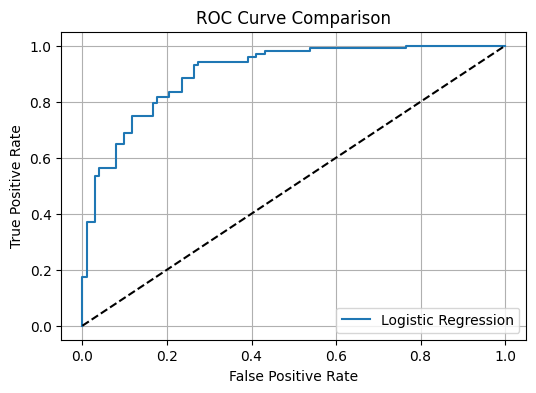

In [35]:
from sklearn.metrics import roc_curve

lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_model.predict_proba(X_test)[:, 1])


plt.figure(figsize=(6,4))
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()
